# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#setting up the url
url="http://api.openweathermap.org/data/2.5/weather?"

In [13]:
#setting up lists and other varibales

city_name=[]
Cloudiness=[]
countries = []
Date = []
Humidity=[]
Lat=[]
Lng=[]
Max_temp=[]
Wind_speed=[]
count=1

In [14]:

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"--------------------")
      
#Find out name, 
for city in cities:  

    try:
            
        baseurl= f"{url}appid={api_key}&q={city}"
      
        city_weather=requests.get(baseurl).json()
        
        name = city_weather['name']
        cloudiness = city_weather['clouds']['all']
        country = city_weather['sys']['country']
        date=city_weather['dt']
        humidity = city_weather['main']['humidity']
        lat = city_weather['coord']['lat']
        lon = city_weather['coord']['lon']
        mx_temp=city_weather['main']['temp_max']
        wind_speed=city_weather['wind']['speed']
        
               
        city_name.append(name) 
        Cloudiness.append(cloudiness)
        countries.append(country)
        Date.append(date)
        Humidity.append(humidity)   
        Lat.append(lat)
        Lng.append(lon)
        Max_temp.append(mx_temp)
        Wind_speed.append(wind_speed)
        
        print(f"Processing record {count} of set |{name} ")
                            
        count+=1
       
            
    except KeyError:
           print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete ")
print("----------------------------- ")  


Beginning Data Retrieval
--------------------
Processing record 1 of set |Albany 
Processing record 2 of set |Bafq 
Processing record 3 of set |Sistranda 
Processing record 4 of set |Saint Anthony 
Processing record 5 of set |Bubaque 
Processing record 6 of set |Punta Arenas 
Processing record 7 of set |Namibe 
Processing record 8 of set |Ken Caryl 
Processing record 9 of set |Cape Town 
Processing record 10 of set |Waddan 
Processing record 11 of set |Hithadhoo 
Processing record 12 of set |Vaini 
Processing record 13 of set |Zarcero 
Processing record 14 of set |Saskylakh 
Processing record 15 of set |Cabo San Lucas 
Processing record 16 of set |Husavik 
Processing record 17 of set |Busselton 
Processing record 18 of set |Yulara 
Processing record 19 of set |Ribeira Grande 
Processing record 20 of set |Avarua 
Processing record 21 of set |Ilula 
Processing record 22 of set |Lebu 
City not found. Skipping...
City not found. Skipping...
Processing record 23 of set |Ushuaia 
Processing 

Processing record 194 of set |French Harbor 
Processing record 195 of set |Hofn 
Processing record 196 of set |Nyurba 
Processing record 197 of set |Gravdal 
Processing record 198 of set |Chuy 
Processing record 199 of set |Roebourne 
Processing record 200 of set |Kalakamati 
Processing record 201 of set |Manokwari 
Processing record 202 of set |Huayucachi 
Processing record 203 of set |Rondonopolis 
Processing record 204 of set |Ponta do Sol 
Processing record 205 of set |Port Elizabeth 
Processing record 206 of set |Santa Clarita 
Processing record 207 of set |Kouqian 
Processing record 208 of set |Moindou 
City not found. Skipping...
Processing record 209 of set |Marienburg 
Processing record 210 of set |Goderich 
Processing record 211 of set |Ginda 
Processing record 212 of set |Dolinsk 
City not found. Skipping...
Processing record 213 of set |Sao Joao da Barra 
Processing record 214 of set |Amberley 
City not found. Skipping...
Processing record 215 of set |Comrie 
Processing rec

Processing record 381 of set |Shar 
Processing record 382 of set |Oranjemund 
Processing record 383 of set |Caliling 
City not found. Skipping...
Processing record 384 of set |Bainbridge 
Processing record 385 of set |Tessalit 
Processing record 386 of set |Lotofaga 
Processing record 387 of set |Port Hedland 
Processing record 388 of set |Ambon 
Processing record 389 of set |Qasigiannguit 
Processing record 390 of set |Jalu 
Processing record 391 of set |Solnechnyy 
Processing record 392 of set |Krasnaya Gora 
Processing record 393 of set |Killam 
City not found. Skipping...
Processing record 394 of set |Oriximina 
City not found. Skipping...
Processing record 395 of set |Madang 
Processing record 396 of set |Csany 
Processing record 397 of set |Pangody 
Processing record 398 of set |Ostrovnoy 
Processing record 399 of set |Nioro 
Processing record 400 of set |Liverpool 
Processing record 401 of set |Coquimbo 
Processing record 402 of set |Natal 
Processing record 403 of set |Hastings

Processing record 561 of set |Sibolga 
Processing record 562 of set |Borovskoy 
City not found. Skipping...
Processing record 563 of set |Yanam 
-----------------------------
Data Retrieval Complete 
----------------------------- 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
City_weather_df=pd.DataFrame({"City":city_name ,
                              "Cloudiness":Cloudiness,
                              "Country":countries,
                              "Date":Date,
                              "Humidity":Humidity,
                              "Lattitude": Lat,
                              "Longitude":Lng,
                              "Max Temp":Max_temp,
                              "Wind Speed":Wind_speed                                 
                                              
                              })
                           
City_weather_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lattitude     563
Longitude     563
Max Temp      563
Wind Speed    563
dtype: int64

In [16]:
#save the dataframe to csv 
City_weather_df.to_csv(output_data_file)
#Display Dataframe
City_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lattitude,Longitude,Max Temp,Wind Speed
0,Albany,1,US,1558907509,34,42.65,-73.75,301.150,8.20
1,Bafq,17,IR,1558907509,24,31.60,55.40,297.129,2.58
2,Sistranda,40,NO,1558907509,80,63.73,8.83,278.710,1.50
3,Saint Anthony,75,US,1558906842,36,43.97,-111.68,291.480,5.10
4,Bubaque,30,GW,1558906967,79,11.28,-15.83,299.629,5.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

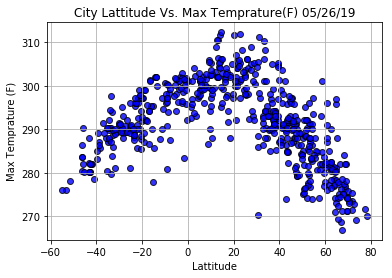

In [17]:
# Build the scatter plots 
Date=time.strftime("%m/%d/%y")

plt.scatter(City_weather_df['Lattitude'],City_weather_df['Max Temp'],marker='o',
            facecolors ="blue", edgecolors='black',alpha = 0.8)

plt.title(f"City Lattitude Vs. Max Temprature(F) {Date}")
plt.xlabel("Lattitude")
plt.ylabel("Max Temprature (F)")
plt.grid(True)
plt.savefig("Images/Temparature.png")
plt.show()


#### Latitude vs. Humidity Plot

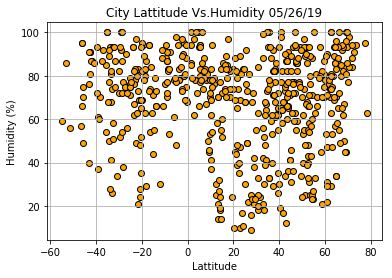

In [18]:
# Build the scatter plots 
Date=time.strftime("%m/%d/%y")

plt.scatter(City_weather_df['Lattitude'],City_weather_df['Humidity'],marker='o',
            facecolors ="orange", edgecolors='black',alpha = 1 )

plt.title(f"City Lattitude Vs.Humidity {Date}")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Images/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

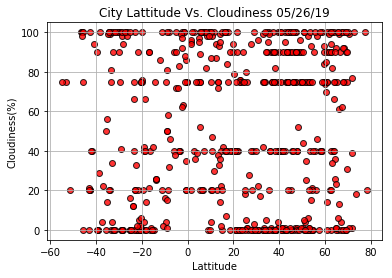

In [19]:
# Build the scatter plots 
Date=time.strftime("%m/%d/%y")

plt.scatter(City_weather_df['Lattitude'],City_weather_df['Cloudiness'],marker='o',
            facecolors ="red", edgecolors='black',alpha = 0.8, )

plt.title(f"City Lattitude Vs. Cloudiness {Date}")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.savefig("Images/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

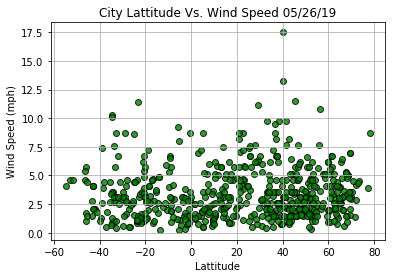

In [20]:
# Build the scatter plots 
Date=time.strftime("%m/%d/%y")

plt.scatter(City_weather_df['Lattitude'],City_weather_df['Wind Speed'],marker='o',
            facecolors ="green", edgecolors='black',alpha = 0.8, )

plt.title(f"City Lattitude Vs. Wind Speed {Date}")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Images/WindSpeed.png")
plt.show()